# Analysis of the relation (linear regression) between the sensation level difference (SL BC - SL AC) and the AC thresholds in the situation with signal at BCD-side

1 July 2023 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import linregress as linregress

In [2]:
# read difference sensation levels BC - AC simulated with a 65 dB ISDS input signal at BCD side (90 degree angle)
def read_diff_sl():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/Diff_SL_65dB_S_BCDside.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', drop=True, inplace=True, verify_integrity=True)
    return df

In [3]:
def select_dsl():
    dsl = read_diff_sl()
    dsl1 = dsl[['f_500_Hz', 'f_1000_Hz', 
              'f_2000_Hz', 'f_4000_Hz']].copy()
    return dsl1

In [4]:
def read_AC_thresholds():
    # read measured thresholds
    f_in = '//media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/AC_measured_thresholds.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', inplace=True)
    return df

In [5]:
def present_AC_thresholds():
    ac = read_AC_thresholds()
    ac1 = ac[['AC_500', 'AC_1000', 
              'AC_2000', 'AC_4000']].copy()
    return ac1

In [6]:
act = present_AC_thresholds()
dsl = select_dsl()

In [7]:
dsl

,f_500_Hz,f_1000_Hz,f_2000_Hz,f_4000_Hz
Study_ID,,,,
34,-39.5,2.0,2.2,22.0
35,-24.6,-0.3,-7.4,27.5
43,-18.4,1.3,-11.6,-5.5
47,-30.5,-1.0,11.5,7.0
50,-38.7,-5.2,-0.2,-0.7
53,-20.7,2.3,0.6,-3.6
54,-19.8,-6.7,5.1,12.7
56,-29.4,-9.9,10.4,19.3
59,-30.3,-7.5,1.3,2.6


In [8]:
act

,AC_500,AC_1000,AC_2000,AC_4000
Study_ID,,,,
34,5,5,10,40
35,15,15,15,55
43,15,10,0,35
47,5,10,15,15
50,0,0,0,15
53,20,10,10,10
54,15,10,15,35
56,15,15,25,60
59,10,15,5,20


In [9]:
for i in range(4):
    ac = (act.iloc[:,i]).to_numpy(dtype='float')
    ds = (dsl.iloc[:,i]).to_numpy(dtype='float')
    lrgrs = linregress(ac, ds)
    f = int(2**(i)*500)
    print(f,'Hz', lrgrs)

500 Hz LinregressResult(slope=0.740193861066236, intercept=-36.8718901453958, rvalue=0.6476192443863285, pvalue=0.002020213874064273, stderr=0.20526929935400773, intercept_stderr=2.37394632482748)
1000 Hz LinregressResult(slope=0.71873417721519, intercept=-11.813924050632913, rvalue=0.5006692370551833, pvalue=0.024546680762309588, stderr=0.2928989320578825, intercept_stderr=2.947238651783329)
2000 Hz LinregressResult(slope=0.7677167277167278, intercept=-5.514529914529917, rvalue=0.7140323137351762, pvalue=0.00040606294513949055, stderr=0.17742502209953767, intercept_stderr=2.5169976641800966)
4000 Hz LinregressResult(slope=0.5009637046307885, intercept=-4.788610763454319, rvalue=0.7197636143095909, pvalue=0.0003464184236206283, stderr=0.11388768383714554, intercept_stderr=3.221230141395007)


In [10]:
ac_1k = act.iloc[:,1].to_numpy(dtype='float')
dsl_1k = (dsl.iloc[:,1]).to_numpy(dtype='float')
lrgrs_1k = linregress(ac_1k, dsl_1k)
r2_1k = (lrgrs_1k[2])**2
r2_1k = round(r2_1k, 2)
s_1k = 'r square 1 kHz = ' + str(r2_1k)
print(s_1k)

r square 1 kHz = 0.25


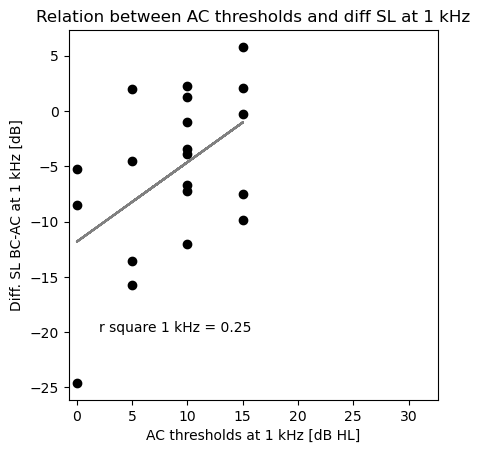

In [11]:
plt.scatter(ac_1k, dsl_1k, c='black')
plt.title("Relation between AC thresholds and diff SL at 1 kHz")
plt.xlabel("AC thresholds at 1 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 1 kHz [dB]")
plt.axis('square')
slope = lrgrs_1k[0]
intercept = lrgrs_1k[1]
plt.plot(ac_1k, slope*ac_1k + intercept, color='grey')
plt.text(2, -20, s_1k)
plt.show()

In [12]:
ac_2k = act.iloc[:,2].to_numpy(dtype='float')
dsl_2k = (dsl.iloc[:,2]).to_numpy(dtype='float')
lrgrs_2k = linregress(ac_2k, dsl_2k)
r2_2k= (lrgrs_2k[2])**2
r2_2k = round(r2_2k, 2)
s_2k = 'r square 2 kHz = ' + str(r2_2k)
print(s_2k)

r square 2 kHz = 0.51


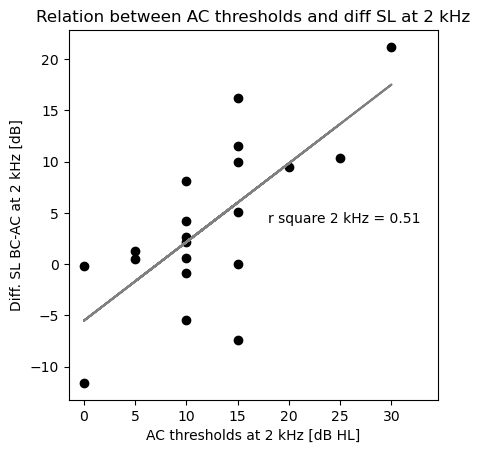

In [13]:
plt.scatter(ac_2k, dsl_2k, c='black')
plt.title("Relation between AC thresholds and diff SL at 2 kHz")
plt.xlabel("AC thresholds at 2 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 2 kHz [dB]")
plt.axis('square')
slope = lrgrs_2k[0]
intercept = lrgrs_2k[1]
plt.plot(ac_2k, slope*ac_2k + intercept, color='grey')
plt.text(18, 4, s_2k)
plt.show()

In [14]:
ac_4k = act.iloc[:,3].to_numpy(dtype='float')
dsl_4k = (dsl.iloc[:,3]).to_numpy(dtype='float')
lrgrs_4k = linregress(ac_4k, dsl_4k)
r2_4k= (lrgrs_4k[2])**2
r2_4k = round(r2_4k, 2)
s_4k = 'r square 4 kHz = ' + str(r2_4k)
print(s_4k)

r square 4 kHz = 0.52


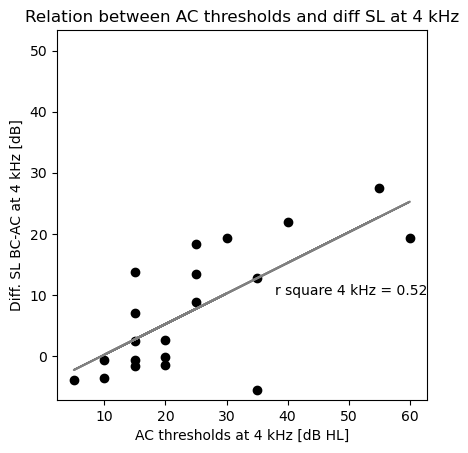

In [15]:
plt.scatter(ac_4k, dsl_4k, c='black')
plt.title("Relation between AC thresholds and diff SL at 4 kHz")
plt.xlabel("AC thresholds at 4 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 4 kHz [dB]")
plt.axis('square')
slope = lrgrs_4k[0]
intercept = lrgrs_4k[1]
plt.plot(ac_4k, slope*ac_4k + intercept, color='grey')
plt.text(38, 10, s_4k)
plt.show()